## Dimensionality Reduction & Visualization MNIST using Capsule Network
* Output(digit-capsule) 2 dimensions(3-D also possible!)
* CapsNet source code referenced by https://github.com/XifengGuo/CapsNet-Keras
* We trained a model with test error 0.01
* Visualization using plotly -> you need to get your API-key for using this
* We compared with a t-SNE 

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import plotly
import numpy as np
from models import base_model
from train import margin_loss
from hyperparams import *
plotly.tools.set_credentials_file(username= PLOTLY_USR , api_key= PLOTLY_API)

### Load MNIST dataset & trained model

In [3]:
from utils import load_mnist

# parameters
routing = ROUTING
model_path = MODEL_PATH

# load data
(x_train, y_train), (x_test, y_test) = load_mnist()
x_shape = x_train[0].shape
y_shape = y_train[0].shape

# define model
train_model , eval_model, caps_model, decoder = base_model(input_shape = x_shape, output_shape = y_shape)

train_model.load_weights(model_path)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 20, 20, 256)  20992       input_1[0][0]                    
__________________________________________________________________________________________________
primarycap_conv2d (Conv2D)      (None, 6, 6, 256)    5308672     conv1[0][0]                      
__________________________________________________________________________________________________
primarycap_reshape (Reshape)    (None, 1152, 8)      0           primarycap_conv2d[0][0]          
__________________________________________________________________________________________________
primarycap

### Predicted digits capsules
* number of capsules means number of classes
* vector in capsule means digit's features

In [4]:
digitscaps = caps_model.predict(x_test)
print(digitscaps.shape)

(10000, 10, 2)


In [5]:
from collections import defaultdict
Xdict = defaultdict(lambda: [])
Ydict = defaultdict(lambda: [])
for i in range(len(x_test)):
    caps = digitscaps[i]
    val_caps = np.max(np.sum(caps ** 2, axis=1))
    arg_caps = np.argmax(np.sum(caps ** 2, axis=1))
    max_caps = caps[arg_caps]
    #print(arg_caps, max_caps, val_caps)
    Xdict[arg_caps].append(max_caps[0])
    Ydict[arg_caps].append(max_caps[1])

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

num_of_classes = 10
data = []
for digit_class in range(num_of_classes):
    digit = go.Scatter(
        x=Xdict[digit_class],
        y=Ydict[digit_class],
        name='digit %d'%(digit_class),
        mode='markers',
        marker=dict(
            size=4,
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )
    data.append(digit)

layout = go.Layout(title="CasNet MNIST 2D scatter",
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='capsnet_mnist_2d_scatter')

In [7]:
from collections import defaultdict
Xdict = defaultdict(lambda: [])
Ydict = defaultdict(lambda: [])
for i in range(len(x_test)):
    caps = digitscaps[i]
    for ic, cap in enumerate(caps):
        Xdict[ic].append(cap[0])
        Ydict[ic].append(cap[1])

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

num_of_classes = 10
data = []
for digit_class in range(num_of_classes):
    digit = go.Scatter(
        x=Xdict[digit_class],
        y=Ydict[digit_class],
        name='digit %d'%(digit_class),
        mode='markers',
        marker=dict(
            size=4,
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )
    data.append(digit)

layout = go.Layout(title="CasNet MNIST 2D scatter",
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='capsnet_mnist_2d_scatter')

The draw time for this plot will be slow for all clients.


/usr/local/lib/python3.5/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [9]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
from glob import glob
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

def visualize_scatter_with_images(X_2d_data, images, figsize=(28,28), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()

In [10]:
XY = []
images = []
for i in range(len(x_test)):
    caps = digitscaps[i]
    val_caps = np.max(np.sum(caps ** 2, axis=1))
    arg_caps = np.argmax(np.sum(caps ** 2, axis=1))
    max_caps = caps[arg_caps]
    XY.append(max_caps)
    images.append(x_test[i].reshape((28,28)))

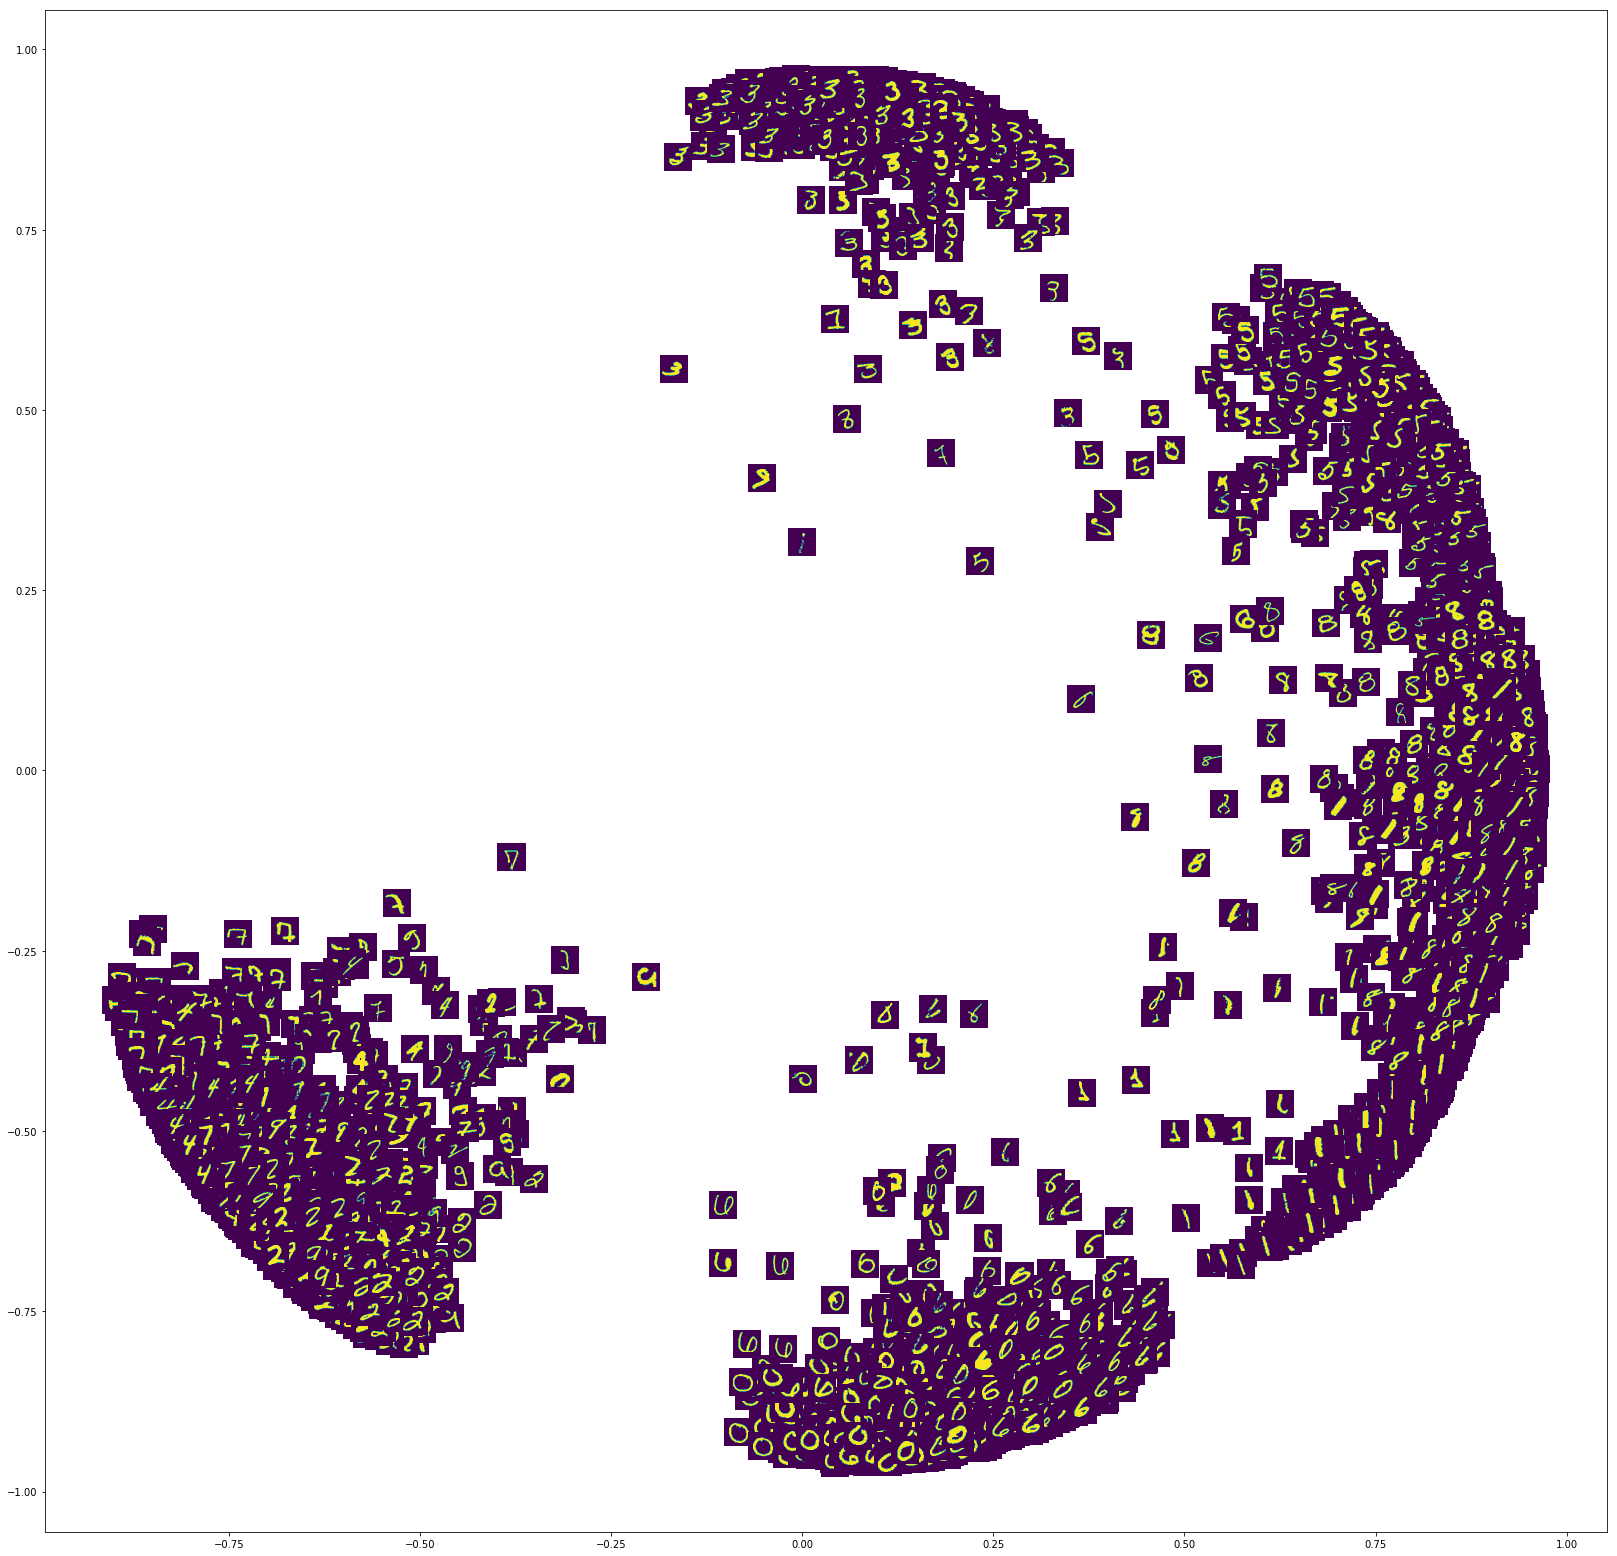

In [11]:
visualize_scatter_with_images(XY, images)

In [12]:
tsne = TSNE(n_components=2, perplexity=40.0)
xt_shape = x_test.shape

In [13]:
x_test_flat = x_test.reshape((xt_shape[0],xt_shape[1]*xt_shape[2]))
print(x_test_flat.shape)

(10000, 784)


In [14]:
tsne_x_test = tsne.fit_transform(x_test_flat)

In [15]:
print(tsne_x_test.shape)

(10000, 2)


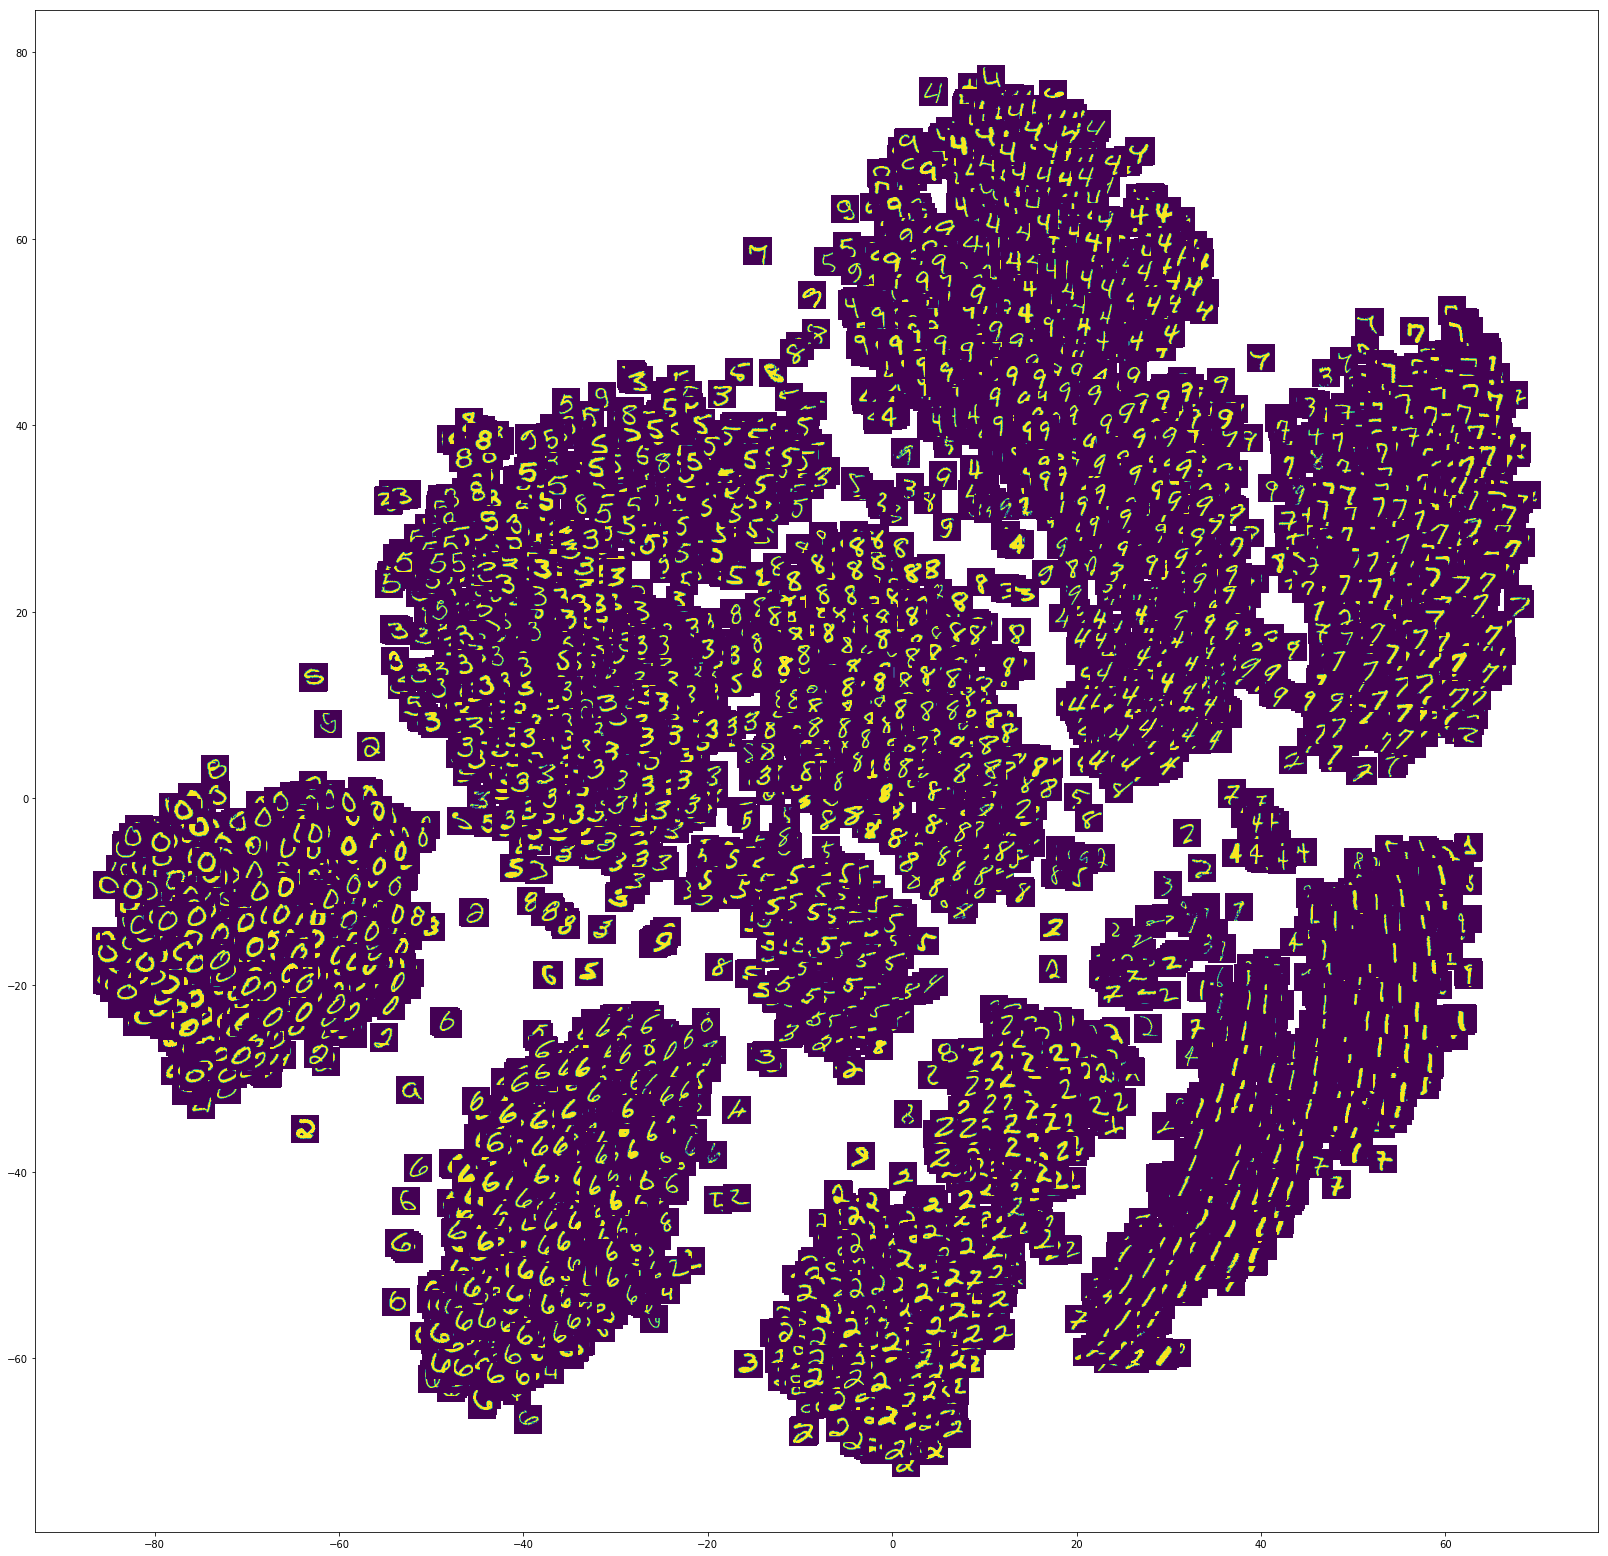

In [16]:
visualize_scatter_with_images(tsne_x_test, images)